<a href="https://colab.research.google.com/github/Adityavenkatramani/Loan_Approval_Prediction/blob/main/Loan_Approval_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [3]:
loan = pd.read_csv('/content/Copy of loan - loan.csv')

In [4]:
loan.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Remove Missing Values

<Axes: >

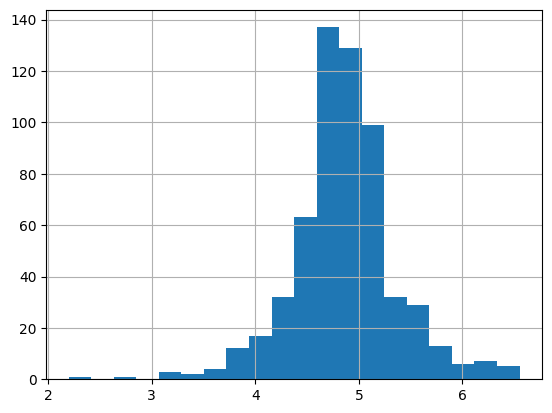

In [7]:
loan['LoanAmount_log'] = np.log(loan['LoanAmount'])
loan['LoanAmount_log'].hist(bins=20)

In [8]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

<Axes: >

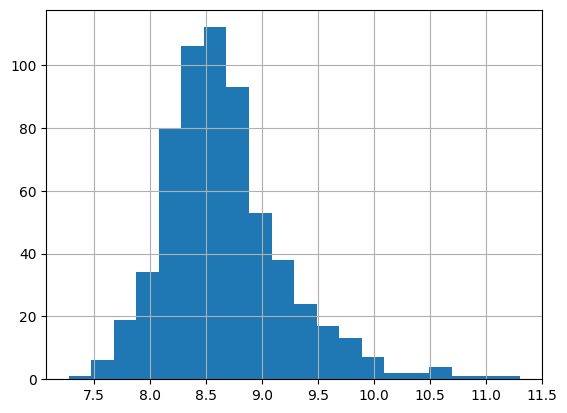

In [9]:
loan['TotalIncome'] = loan['ApplicantIncome']+loan['CoapplicantIncome']
loan['TotalIncome_log'] = np.log(loan['TotalIncome'])
loan['TotalIncome_log'].hist(bins=20)

In [13]:
loan['Gender'].fillna(loan['Gender'].mode()[0],inplace = True)
loan['Married'].fillna(loan['Married'].mode()[0],inplace = True)
loan['Dependents'].fillna(loan['Dependents'].mode()[0],inplace = True)
loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0],inplace = True)

loan.LoanAmount = loan.LoanAmount.fillna(loan.LoanAmount.mean())
loan.LoanAmount_log = loan.LoanAmount_log.fillna(loan.LoanAmount.mean())

loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mode()[0],inplace=True)
loan['Credit_History'].fillna(loan['Credit_History'].mode()[0],inplace = True)

In [14]:
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

All Null values have been treated

In [15]:
x=loan.iloc[:,np.r_[1:5,9:11,13:15]].values  #x=loan.drop(columns=['Loan_status]) , y=loan['Loan_Status']
y=loan.iloc[:,12].values

In [16]:
x

array([['Male', 'No', '0', ..., 1.0, 146.41216216216216, 5849.0],
       ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [17]:
y #Y - {1} , N-{0}

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

Iloc helps in selecting / retreiving columns usingn indices

Number of people who take loan as group by Gender : Male      502
Female    112
Name: Gender, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

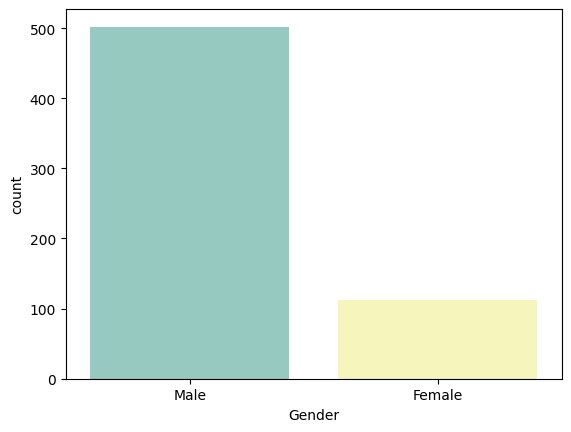

In [26]:
print("Number of people who take loan as group by Gender : ",end="")
print(loan['Gender'].value_counts())
sns.countplot(x='Gender',data=loan,palette='Set3')

Number of people who take loan as group by Marital Status :  Yes    401
No     213
Name: Married, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

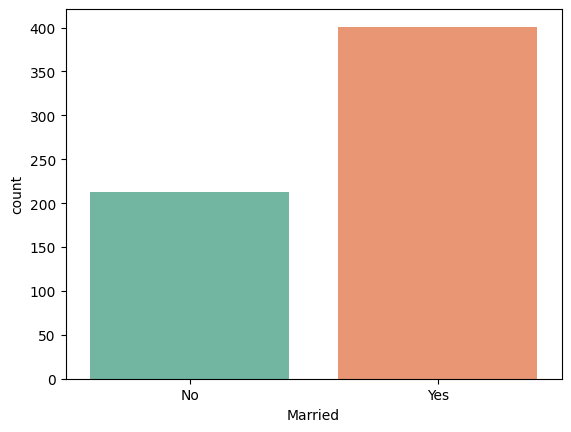

In [27]:
print("Number of people who take loan as group by Marital Status : ",end=" ")
print(loan['Married'].value_counts())
sns.countplot(x='Married',data=loan,palette='Set2')

Number of people who take loan as grouped by Dependents :  0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

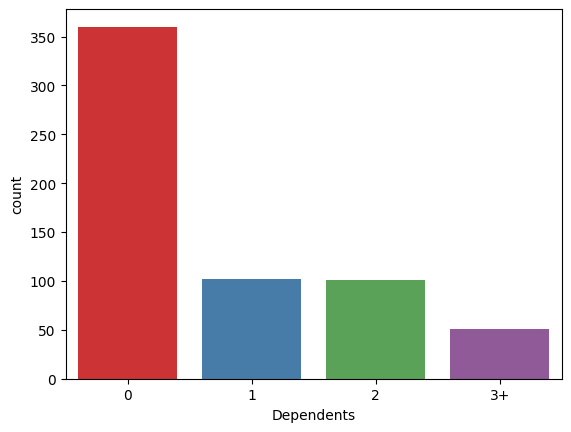

In [28]:
print("Number of people who take loan as grouped by Dependents : ",end=" ")
print(loan['Dependents'].value_counts())
sns.countplot(x='Dependents',data=loan,palette='Set1')

Number of people who take loan as grouped by Self Employment :  No     532
Yes     82
Name: Self_Employed, dtype: int64


<Axes: xlabel='Self_Employed', ylabel='count'>

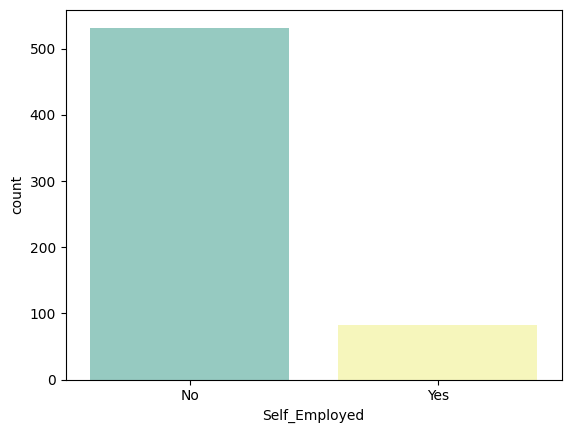

In [29]:
print("Number of people who take loan as grouped by Self Employment : ",end=" ")
print(loan['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed',data=loan,palette='Set3')

Number of people who take loan as grouped by Loan Amount :  146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: LoanAmount, Length: 204, dtype: int64


<Axes: xlabel='LoanAmount', ylabel='count'>

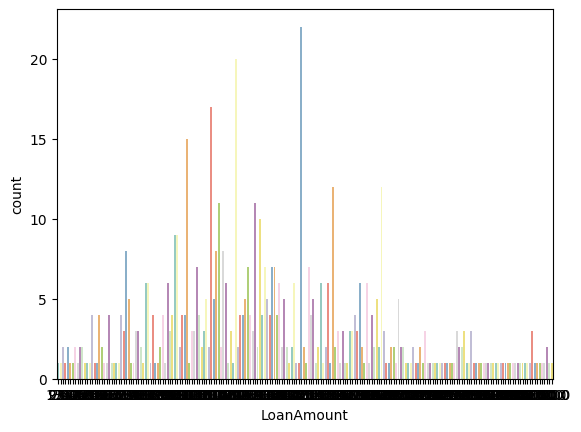

In [31]:
print("Number of people who take loan as grouped by Loan Amount : ",end=" ")
print(loan['LoanAmount'].value_counts())
sns.countplot(x='LoanAmount',data=loan,palette='Set3')

Number of people who take loan as grouped by Credit History :  1.0    525
0.0     89
Name: Credit_History, dtype: int64


<Axes: xlabel='Credit_History', ylabel='count'>

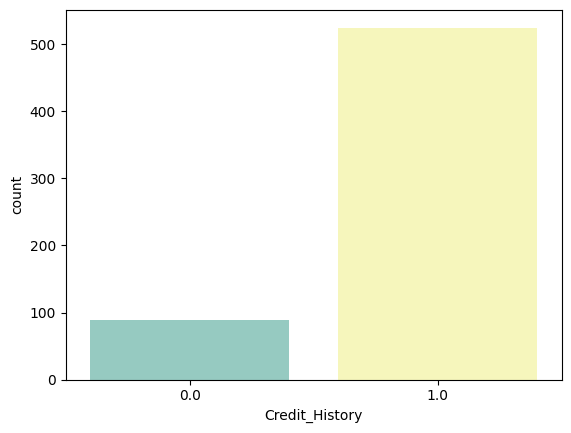

In [32]:
print("Number of people who take loan as grouped by Credit History : ",end=" ")
print(loan['Credit_History'].value_counts())
sns.countplot(x='Credit_History',data=loan,palette='Set3')

In [97]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2)




In [98]:
from sklearn.preprocessing import LabelEncoder
Labelencoder_x=LabelEncoder()

In [99]:
for i in range(0,5):
  x_train[:,i] = Labelencoder_x.fit_transform(x_train[:,i])
  x_train[:,7] = Labelencoder_x.fit_transform(x_train[:,7])

x_train

array([[1, 1, 2, ..., 1.0, 5.231108616854587, 312],
       [1, 0, 0, ..., 1.0, 4.8283137373023015, 175],
       [1, 1, 0, ..., 1.0, 5.087596335232384, 272],
       ...,
       [0, 0, 0, ..., 1.0, 5.41610040220442, 384],
       [1, 1, 1, ..., 0.0, 5.081404364984463, 280],
       [1, 0, 0, ..., 0.0, 4.143134726391533, 7]], dtype=object)

In [100]:
Labelencoder_y = LabelEncoder()

y_train = Labelencoder_y.fit_transform(y_train)

y_train

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,

In [101]:
for i in range(0,5):
  x_test[:,i]=Labelencoder_x.fit_transform(x_test[:,i])
  x_test[:,7]=Labelencoder_x.fit_transform(x_test[:,7])

x_test

array([[0, 1, 0, ..., 0.0, 5.181783550292085, 84],
       [1, 1, 0, ..., 0.0, 4.6443908991413725, 79],
       [1, 0, 0, ..., 1.0, 5.017279836814924, 126],
       ...,
       [1, 1, 2, ..., 1.0, 4.890349128221754, 127],
       [1, 1, 2, ..., 1.0, 5.3471075307174685, 134],
       [0, 1, 0, ..., 1.0, 4.727387818712341, 105]], dtype=object)

In [102]:
Labelencoder_y=LabelEncoder()
y_test = Labelencoder_y.fit_transform(y_test)

y_test

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1])

In [103]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)



In [104]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [105]:
from sklearn import metrics
y_preds = rf.predict(x_test)

y_preds

print("Accuracy from Random Forest Classifier is :",metrics.accuracy_score(y_test,y_preds)*100,"%")

Accuracy from Random Forest Classifier is : 77.83783783783784 %


In [106]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [107]:
y_pred = nb.predict(x_test)

In [108]:
print("Accuracy from Gaussian Naive Bayes is :", metrics.accuracy_score(y_pred,y_test)*100 ,"%")

Accuracy from Gaussian Naive Bayes is : 78.91891891891892 %


In [109]:
from sklearn.linear_model import LogisticRegression

In [110]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [111]:
y_pred = lr.predict(x_test)
print("Accuracy from Logistic Regression is :" , metrics.accuracy_score(y_pred,y_test)*100,"%")

Accuracy from Logistic Regression is : 80.0 %


We find that Logistic Regression Provides a Good accuracy of 80 %